# GPM

imports

In [1]:
import xarray as xr
import intake

Open the catalogue and access the data at once

In [13]:
cat = intake.open_catalog('https://raw.githubusercontent.com/eerie-project/intake_catalogues/main/eerie.yaml')\
                          ['dkrz']['dkrz_eerie_disk']['dkrz_eerie_observations']

In [17]:
gpm = cat['GPM']['imerg']#['ebaf-toa42']#['woa18_2005_2017']
print(list(gpm))

['hourly']


In [18]:
data=cat['GPM']['imerg']['hourly'].to_dask()

In [10]:
data

<xarray.Dataset>
Dimensions:           (time: 15336, bnds: 2, lon: 3600, lat: 1200)
Coordinates:
  * time              (time) datetime64[ns] 2020-01-01T00:15:00 ... 2021-09-3...
  * lon               (lon) float32 -179.9 -179.9 -179.8 ... 179.8 179.9 179.9
  * lat               (lat) float32 -59.95 -59.85 -59.75 ... 59.75 59.85 59.95
Dimensions without coordinates: bnds
Data variables:
    time_bnds         (time, bnds) datetime64[ns] dask.array<chunksize=(24, 2), meta=np.ndarray>
    precipitationCal  (time, lat, lon) float32 dask.array<chunksize=(24, 1200, 3600), meta=np.ndarray>
Attributes:
    CDI:                                    Climate Data Interface version 1....
    history:                                Sun Aug 01 20:58:34 2021: cdo mer...
    Conventions:                            CF-1.6
    Original_Producer_Metadata_FileHeader:  DOI=10.5067/GPM/IMERG/3B-HH/06;\n...
    Original_Producer_Metadata_FileInfo:    DataFormatVersion=6a;\nTKCodeBuil...
    Original_Producer_Metadata_GridHeader:  BinMethod=ARITHMETIC_MEAN;\nRegis...
    InputPointer:                           3B-HHR.MS.MRG.3IMERG.20200101-S00...
    history_L34RS:                          'Created by L34RS v1.4.2 @ NASA G...
    NCO:                                    netCDF Operators version 4.9.7 (H...
    CDO:                                    Climate Data Operators version 1....

In [11]:
data['precipitationCal']

<xarray.DataArray 'precipitationCal' (time: 15336, lat: 1200, lon: 3600)>
dask.array<concatenate, shape=(15336, 1200, 3600), dtype=float32, chunksize=(24, 1200, 3600), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01T00:15:00 ... 2021-09-30T23:15:00
  * lon      (lon) float32 -179.9 -179.9 -179.8 -179.6 ... 179.8 179.9 179.9
  * lat      (lat) float32 -59.95 -59.85 -59.75 -59.65 ... 59.75 59.85 59.95
Attributes:
    units:             mm/hr
    DimensionNames:    time,lon,lat
    Units:             mm/hr
    CodeMissingValue:  -9999.9

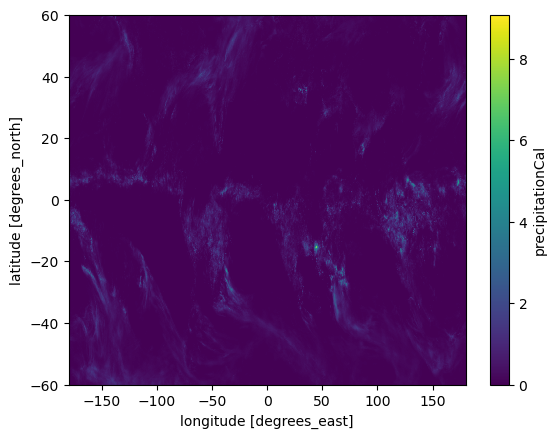

In [12]:
data['precipitationCal'].sel(time=slice('2020-01-01', '2020-01-05')).mean(dim='time').plot()

In [16]:
from dask.distributed import Client
import dask
dask.config.config.get('distributed').get('dashboard').update({'link':'{JUPYTERHUB_SERVICE_PREFIX}/proxy/{port}/status'})
dask.config.set({'temporary_directory': '/scratch/a/a270088/dask/'})
# client = Client(n_workers=5, threads_per_worker=1, memory_limit='50GB')
client = Client(n_workers=20, threads_per_worker=1, memory_limit='10GB')
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /user/a270088/levante-spawner-preset//proxy/8787/status,
Dashboard: /user/a270088/levante-spawner-preset//proxy/8787/status,Workers: 20
Total threads: 20,Total memory: 186.26 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:35077,Workers: 20
Dashboard: /user/a270088/levante-spawner-preset//proxy/8787/status,Total threads: 20
Started: Just now,Total memory: 186.26 GiB
Comm: tcp://127.0.0.1:39631,Total threads: 1
Dashboard: /user/a270088/levante-spawner-preset//proxy/40989/status,Memory: 9.31 GiB
Nanny: tcp://127.0.0.1:45263,


In [13]:
mean = data['precipitationCal'].sel(time=slice('2010', '2020')).mean(dim='time').compute()

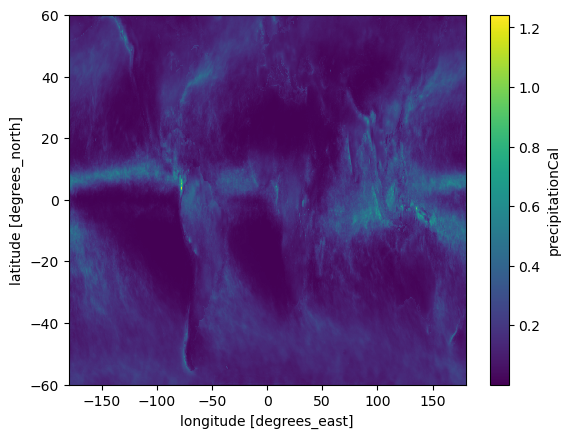

In [14]:
mean.plot()